In [6]:
import pandas as pd
import numpy as np
import os
import sqlite3
import matplotlib.pyplot as plt
from datetime import datetime


In [7]:


# Load employment data

employment_df = pd.read_csv("employment.csv")
employment_df



,FREQ,FREQ_LABEL,REF_AREA,REF_AREA_LABEL,INDICATOR,INDICATOR_LABEL,UNIT_MEASURE,UNIT_MEASURE_LABEL,AGG_METHOD,AGG_METHOD_LABEL,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,A,Annual,ABW,Aruba,WB_WDI_SL_EMP_TOTL_SP_NE_ZS,"Employment to population ratio, 15+, total (%)...",PT,Percentage,_Z,Not Applicable,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A,Annual,AFG,Afghanistan,WB_WDI_SL_EMP_TOTL_SP_NE_ZS,"Employment to population ratio, 15+, total (%)...",PT,Percentage,_Z,Not Applicable,...,47.631,NaN,NaN,42.015000,NaN,NaN,36.710,46.906,NaN,NaN
2,A,Annual,AFW,Africa Western and Central,WB_WDI_SL_EMP_TOTL_SP_NE_ZS,"Employment to population ratio, 15+, total (%)...",PT,Percentage,_Z,Not Applicable,...,NaN,NaN,NaN,63.101578,NaN,56.979612,NaN,NaN,72.606365,NaN
3,A,Annual,AGO,Angola,WB_WDI_SL_EMP_TOTL_SP_NE_ZS,"Employment to population ratio, 15+, total (%)...",PT,Percentage,_Z,Not Applicable,...,39.384,NaN,NaN,NaN,NaN,62.645000,NaN,64.306,64.620000,NaN
4,A,Annual,ALB,Albania,WB_WDI_SL_EMP_TOTL_SP_NE_ZS,"Employment to population ratio, 15+, total (%)...",PT,Percentage,_Z,Not Applicable,...,43.775,45.955,48.477,50.152000,52.000,53.392000,52.457,52.836,55.457000,57.066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,A,Annual,XKX,Kosovo,WB_WDI_SL_EMP_TOTL_SP_NE_ZS,"Employment to population ratio, 15+, total (%)...",PT,Percentage,_Z,Not Applicable,...,24.055,22.488,24.743,25.934000,26.188,26.747000,25.089,27.523,29.919000,NaN
238,A,Annual,YEM,"Yemen, Rep.",WB_WDI_SL_EMP_TOTL_SP_NE_ZS,"Employment to population ratio, 15+, total (%)...",PT,Percentage,_Z,Not Applicable,...,31.370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
239,A,Annual,ZAF,South Africa,WB_WDI_SL_EMP_TOTL_SP_NE_ZS,"Employment to population ratio, 15+, total (%)...",PT,Percentage,_Z,Not Applicable,...,40.044,40.862,40.195,40.393000,40.319,39.534000,35.779,34.332,35.701000,37.359
240,A,Annual,ZMB,Zambia,WB_WDI_SL_EMP_TOTL_SP_NE_ZS,"Employment to population ratio, 15+, total (%)...",PT,Percentage,_Z,Not Applicable,...,NaN,44.711,NaN,59.833000,55.533,56.247000,57.200,56.976,55.964000,58.329


In [3]:
# Load poverty data

poverty_df = pd.read_csv("poverty.csv")
poverty_df


,STRUCTURE,STRUCTURE_ID,ACTION,FREQ,FREQ_LABEL,REF_AREA,REF_AREA_LABEL,INDICATOR,INDICATOR_LABEL,SEX,...,DATA_SOURCE_LABEL,UNIT_TYPE,UNIT_TYPE_LABEL,TIME_FORMAT,TIME_FORMAT_LABEL,COMMENT_OBS,OBS_STATUS,OBS_STATUS_LABEL,OBS_CONF,OBS_CONF_LABEL
0,datastructure,WB.DATA360:DS_DATA360(1.3),I,A,Annual,BLR,Belarus,WB_WDI_SI_POV_NAHC,Poverty headcount ratio at national poverty li...,_T,...,World Development Indicators (WDI),RATIO,Ratio,P1Y,Annual,NaN,A,Normal value,PU,Public
1,datastructure,WB.DATA360:DS_DATA360(1.3),I,A,Annual,BOL,Bolivia,WB_WDI_SI_POV_NAHC,Poverty headcount ratio at national poverty li...,_T,...,World Development Indicators (WDI),RATIO,Ratio,P1Y,Annual,NaN,A,Normal value,PU,Public
2,datastructure,WB.DATA360:DS_DATA360(1.3),I,A,Annual,CHL,Chile,WB_WDI_SI_POV_NAHC,Poverty headcount ratio at national poverty li...,_T,...,World Development Indicators (WDI),RATIO,Ratio,P1Y,Annual,NaN,A,Normal value,PU,Public
3,datastructure,WB.DATA360:DS_DATA360(1.3),I,A,Annual,CHN,China,WB_WDI_SI_POV_NAHC,Poverty headcount ratio at national poverty li...,_T,...,World Development Indicators (WDI),RATIO,Ratio,P1Y,Annual,NaN,A,Normal value,PU,Public
4,datastructure,WB.DATA360:DS_DATA360(1.3),I,A,Annual,SWZ,Eswatini,WB_WDI_SI_POV_NAHC,Poverty headcount ratio at national poverty li...,_T,...,World Development Indicators (WDI),RATIO,Ratio,P1Y,Annual,NaN,A,Normal value,PU,Public
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,datastructure,WB.DATA360:DS_DATA360(1.3),I,A,Annual,POL,Poland,WB_WDI_SI_POV_NAHC,Poverty headcount ratio at national poverty li...,_T,...,World Development Indicators (WDI),RATIO,Ratio,P1Y,Annual,NaN,A,Normal value,PU,Public
1046,datastructure,WB.DATA360:DS_DATA360(1.3),I,A,Annual,TJK,Tajikistan,WB_WDI_SI_POV_NAHC,Poverty headcount ratio at national poverty li...,_T,...,World Development Indicators (WDI),RATIO,Ratio,P1Y,Annual,NaN,A,Normal value,PU,Public
1047,datastructure,WB.DATA360:DS_DATA360(1.3),I,A,Annual,URY,Uruguay,WB_WDI_SI_POV_NAHC,Poverty headcount ratio at national poverty li...,_T,...,World Development Indicators (WDI),RATIO,Ratio,P1Y,Annual,NaN,A,Normal value,PU,Public
1048,datastructure,WB.DATA360:DS_DATA360(1.3),I,A,Annual,UZB,Uzbekistan,WB_WDI_SI_POV_NAHC,Poverty headcount ratio at national poverty li...,_T,...,World Development Indicators (WDI),RATIO,Ratio,P1Y,Annual,NaN,A,Normal value,PU,Public


DATA CLEANING

In [52]:


try:
    # ------------------------
   #Clean Employment Data
    # ------------------------
    sa_employment = employment_df[
        employment_df['REF_AREA_LABEL'] == 'South Africa'
    ].copy()
    
    if sa_employment.empty:
        raise ValueError("No employment data found for South Africa.")
    
    year_cols = [col for col in sa_employment.columns if col.isdigit()]
    
    if not year_cols:
        raise ValueError("No year columns found in employment data.")
    
    employment_clean = pd.melt(
        sa_employment,
        id_vars=['REF_AREA_LABEL', 'INDICATOR_LABEL'],
        value_vars=year_cols,
        var_name='year',
        value_name='employment_rate'
    )
    
    employment_clean.rename(columns={'REF_AREA_LABEL': 'country'}, inplace=True)
    employment_clean['year'] = pd.to_numeric(employment_clean['year'], errors='coerce')
    employment_clean['employment_rate'] = pd.to_numeric(employment_clean['employment_rate'], errors='coerce')
    
    # ------------------------
    #  Clean Poverty Data
    # ------------------------
    sa_poverty = poverty_df[
        poverty_df['REF_AREA_LABEL'] == 'South Africa'
    ].copy()
    
    if sa_poverty.empty:
        raise ValueError("No poverty data found for South Africa.")
    
    poverty_clean = sa_poverty[['REF_AREA_LABEL', 'TIME_PERIOD', 'OBS_VALUE', 'INDICATOR_LABEL']].copy()
    poverty_clean.rename(
        columns={
            'REF_AREA_LABEL': 'country',
            'TIME_PERIOD': 'year',
            'OBS_VALUE': 'poverty_rate'
        },
        inplace=True
    )
    
    poverty_clean['year'] = pd.to_numeric(poverty_clean['year'], errors='coerce')
    poverty_clean['poverty_rate'] = pd.to_numeric(poverty_clean['poverty_rate'], errors='coerce')
    poverty_clean.dropna(subset=['year', 'poverty_rate'], inplace=True)
    
    print("Poverty data cleaned successfully.")
    print(f"Clean poverty data shape: {poverty_clean.shape}")
    
    # ------------------------
    #  Merge Datasets
    # ------------------------
    merged_data = pd.merge(
        employment_clean,
        poverty_clean,
        on=['year', 'country'],
        how='outer',
        suffixes=('_employment', '_poverty')
    )
    
    if merged_data.empty:
        raise ValueError("Merged data is empty after merging employment and poverty datasets.")
    
    merged_data.sort_values('year', inplace=True)
    merged_data.reset_index(drop=True, inplace=True)
    print("Datasets merged successfully.")
    
    # ------------------------
    #  Handle Missing Values
    # ------------------------
    merged_data['employment_rate'].fillna(method='ffill', inplace=True)
    merged_data['poverty_rate'].fillna(method='ffill', inplace=True)
    
    final_data = merged_data.dropna(subset=['employment_rate', 'poverty_rate'], how='all').copy()
    
    print("Missing values handled successfully.")
    print(f"Final data shape after handling missing values: {final_data.shape}")
    
    # ------------------------
    # Generate Descriptive Statistics
    # ------------------------
    print("Descriptive Statistics:")
    print(final_data[['year', 'employment_rate', 'poverty_rate']].describe())
    
    # ------------------------
    #  Save Processed Data
    # ------------------------
    processed_data_path = "processed_data"
    os.makedirs(processed_data_path, exist_ok=True)
    output_path = os.path.join(processed_data_path, "south_africa_clean.csv")
    
    final_data.to_csv(output_path, index=False)
    print(f"\nProcessed data saved to: {output_path}")
    
except FileNotFoundError as fnf_error:
    print("File not found. Please check the dataset path:", fnf_error)
except ValueError as ve:
    print("Value error:", ve)
except KeyError as ke:
    print("Missing expected column in the dataset:", ke)
except Exception as e:
    print("An unexpected error occurred:", e)


Poverty data cleaned successfully.
Clean poverty data shape: (4, 4)
Datasets merged successfully.
Missing values handled successfully.
Final data shape after handling missing values: (30, 6)
Descriptive Statistics:
              year  employment_rate  poverty_rate
count    30.000000        30.000000     19.000000
mean   2008.500000        39.164067     57.463158
std       8.803408         3.740745      4.741567
min    1994.000000        27.700000     53.200000
25%    2001.250000        36.939750     55.500000
50%    2008.500000        39.787500     55.500000
75%    2015.750000        41.449250     58.800000
max    2023.000000        44.896000     66.600000

Processed data saved to: processed_data\south_africa_clean.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_22388\919937277.py:80: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['employment_rate'].fillna(method='ffill', inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_22388\919937277.py:80: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_data['employment_rate'].fillna(method='ffill', inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_22388\919937277.py:81: FutureWarning:

NUMERICAL ANALYSIS

In [53]:
try:
    # ------------------------
    # Extract columns as NumPy arrays
    # ------------------------
    years = final_data['year'].values
    employment_rates = final_data['employment_rate'].values
    poverty_rates = final_data['poverty_rate'].values

    if len(years) == 0 or len(employment_rates) == 0 or len(poverty_rates) == 0:
        raise ValueError("One or more arrays are empty. Check your final_data.")

    print("Years:", years)
    print("Employment Rates:", employment_rates)
    print("Poverty Rates:", poverty_rates)

    # ------------------------
    # Reshape into column vectors (n,1)
    # ------------------------
    try:
        employment_rates_col = employment_rates.reshape(-1, 1)
        poverty_rates_col = poverty_rates.reshape(-1, 1)
        print("Employment Rates reshaped:", employment_rates_col.shape)
        print("Poverty Rates reshaped:", poverty_rates_col.shape)
    except Exception as reshape_error:
        print("Error reshaping arrays:", reshape_error)
        employment_rates_col = employment_rates
        poverty_rates_col = poverty_rates

    # ------------------------
    # Employment Statistics
    # ------------------------
    emp_mean = np.mean(employment_rates)
    emp_median = np.median(employment_rates)
    emp_std = np.std(employment_rates)
    emp_min = np.min(employment_rates)
    emp_max = np.max(employment_rates)

    # ------------------------
    # Poverty Statistics
    # ------------------------
    pov_mean = np.mean(poverty_rates)
    pov_median = np.median(poverty_rates)
    pov_std = np.std(poverty_rates)
    pov_min = np.min(poverty_rates)
    pov_max = np.max(poverty_rates)

    print("\nEmployment Stats: mean={:.2f}, median={:.2f}, std={:.2f}, min={:.2f}, max={:.2f}".format(
        emp_mean, emp_median, emp_std, emp_min, emp_max
    ))
    print("Poverty Stats: mean={:.2f}, median={:.2f}, std={:.2f}, min={:.2f}, max={:.2f}".format(
        pov_mean, pov_median, pov_std, pov_min, pov_max
    ))

except KeyError as ke:
    print("Column not found in final_data:", ke)
except ValueError as ve:
    print("Value error:", ve)
except Exception as e:
    print("An unexpected error occurred during numerical analysis:", e)

Years: [1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007
 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021
 2022 2023]
Employment Rates: [38.2   37.8   34.8   27.7   34.    36.8   35.587 44.08  42.834 41.511
 41.593 43.376 44.896 44.43  43.286 41.264 39.365 39.317 39.524 40.041
 40.044 40.862 40.195 40.393 40.319 39.534 35.779 34.332 35.701 37.359]
Poverty Rates: [ nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan 66.6 66.6 66.6
 62.1 62.1 53.2 53.2 53.2 53.2 55.5 55.5 55.5 55.5 55.5 55.5 55.5 55.5
 55.5 55.5]
Employment Rates reshaped: (30, 1)
Poverty Rates reshaped: (30, 1)

Employment Stats: mean=39.16, median=39.79, std=3.68, min=27.70, max=44.90
Poverty Stats: mean=nan, median=nan, std=nan, min=nan, max=nan


VISUALIZATION

In [18]:
data = pd.read_csv(output_path)

In [22]:
#Create the 'complete_data' dataframe for the scatter plot
complete_data = data.dropna(subset=['employment_rate', 'poverty_rate']).copy()

# Ensure numeric columns are of the correct type
data['year'] = pd.to_numeric(data['year'], errors='coerce')
data['employment_rate'] = pd.to_numeric(data['employment_rate'], errors='coerce')
data['poverty_rate'] = pd.to_numeric(data['poverty_rate'], errors='coerce')


In [30]:
filtered_data = complete_data[(complete_data['year'] >= 2005) & (complete_data['year'] <= 2023)].copy()

years = filtered_data['year'].values
employment_rates = filtered_data['employment_rate'].values
poverty_rates = filtered_data['poverty_rate'].values

bar_width = 0.35
x_pos = np.arange(len(years))

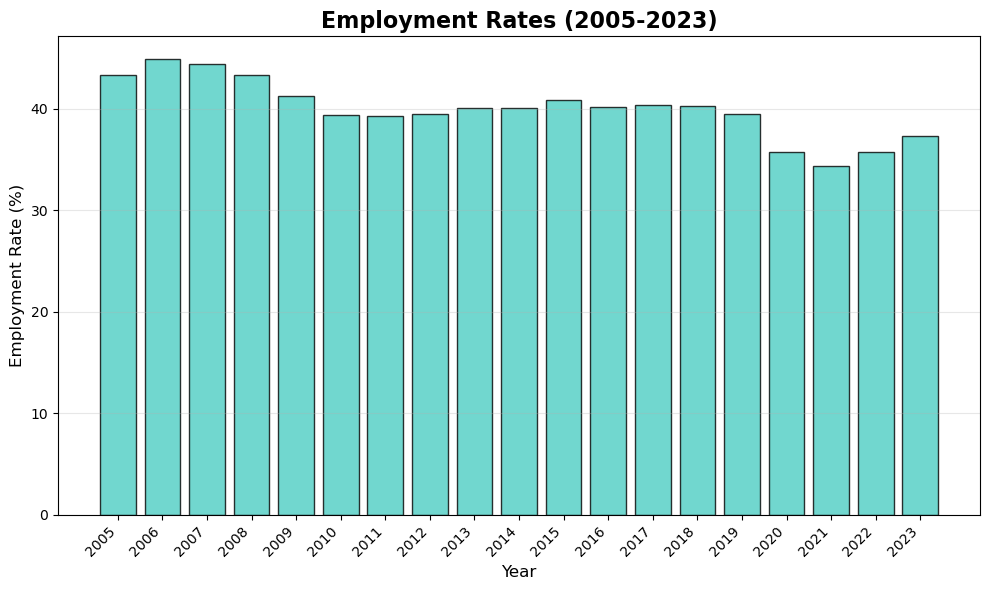

In [31]:
# Employment Rate Bar Chart
plt.figure(figsize=(10, 6))
plt.bar(years, employment_rates, color='#4ECDC4', alpha=0.8, edgecolor='black', linewidth=1)
plt.title('Employment Rates (2005-2023)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Employment Rate (%)', fontsize=12)
plt.xticks(years, rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig('employment_rate.png')
plt.show()

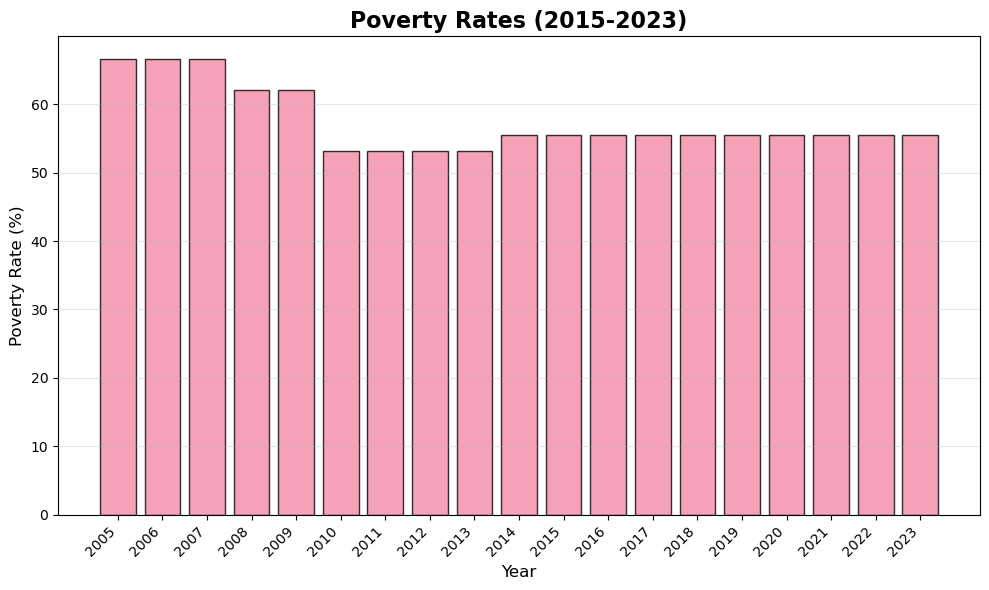

In [33]:
plt.figure(figsize=(10, 6))
plt.bar(years, poverty_rates, color='#F38BA8', alpha=0.8, edgecolor='black', linewidth=1)
plt.title('Poverty Rates (2015-2023)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Poverty Rate (%)', fontsize=12)
plt.xticks(years, rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig('poverty_rate.png')
plt.show()

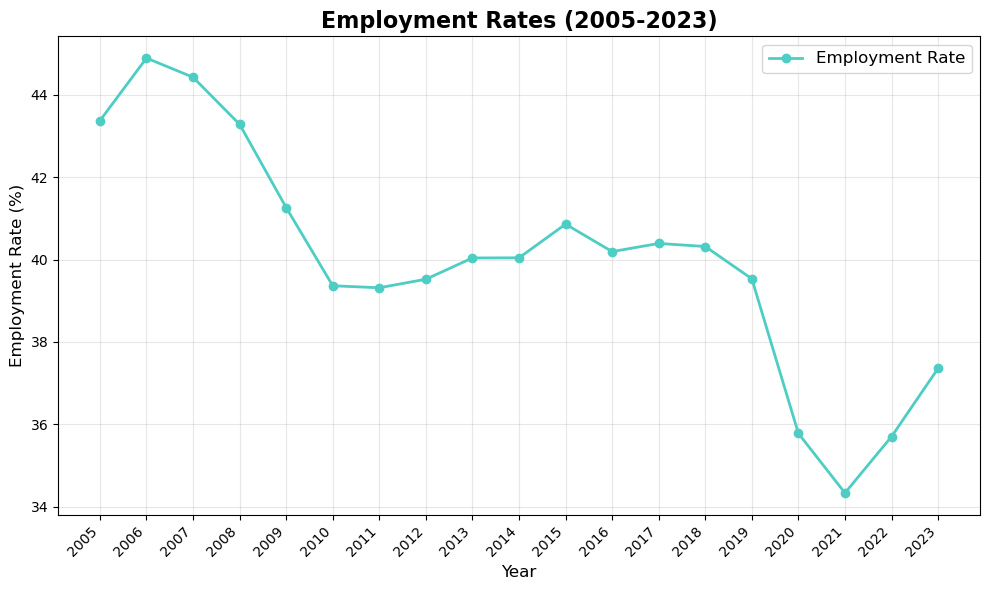

In [35]:
# Employment Rate Line Chart
plt.figure(figsize=(10, 6))
plt.plot(years, employment_rates, marker='o', color='#4ECDC4', linewidth=2, label='Employment Rate')
plt.title('Employment Rates (2005-2023)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Employment Rate (%)', fontsize=12)
plt.xticks(years, rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('employment_rate_line.png')
plt.show()

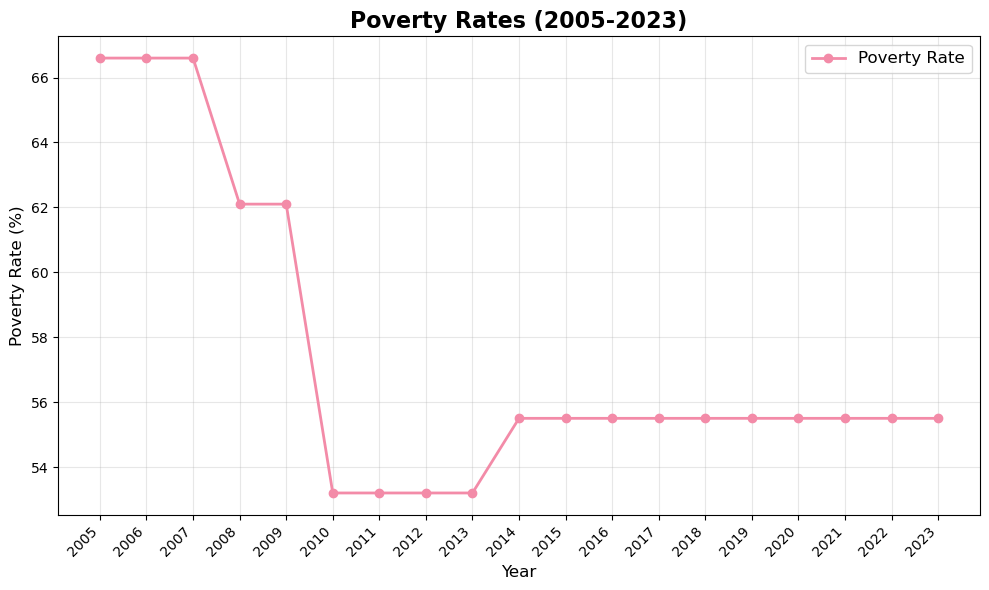

In [34]:
# Poverty Rate Line Chart
plt.figure(figsize=(10, 6))
plt.plot(years, poverty_rates, marker='o', color='#F38BA8', linewidth=2, label='Poverty Rate')
plt.title('Poverty Rates (2005-2023)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Poverty Rate (%)', fontsize=12)
plt.xticks(years, rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('poverty_rate_line.png')
plt.show()

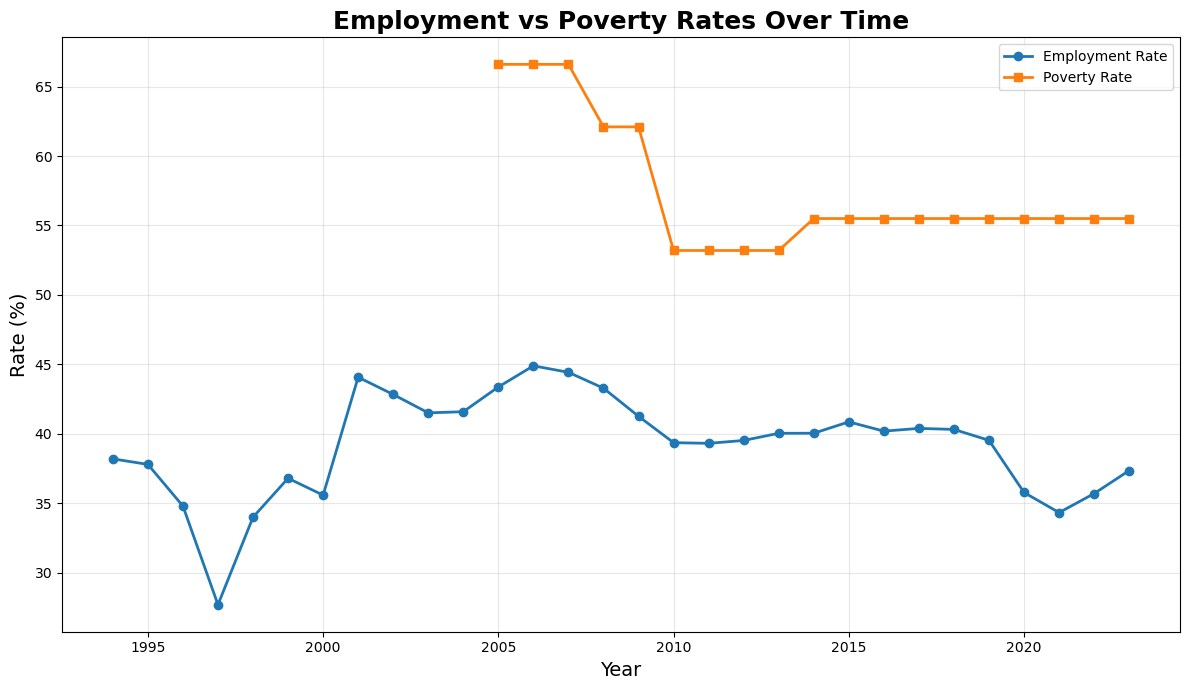

<Figure size 640x480 with 0 Axes>

In [44]:
# Combined time series plot
plt.figure(figsize=(12, 7))
plt.plot(data['year'], data['employment_rate'], 
         marker='o', label='Employment Rate', linewidth=2)
plt.plot(complete_data['year'], complete_data['poverty_rate'], 
         marker='s', label='Poverty Rate', linewidth=2)
plt.title('Employment vs Poverty Rates Over Time', fontsize=18, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Rate (%)', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
plt.savefig('combined_time_series.png')

DATABASE INTERGRATION

Generating correlation scatter plot...


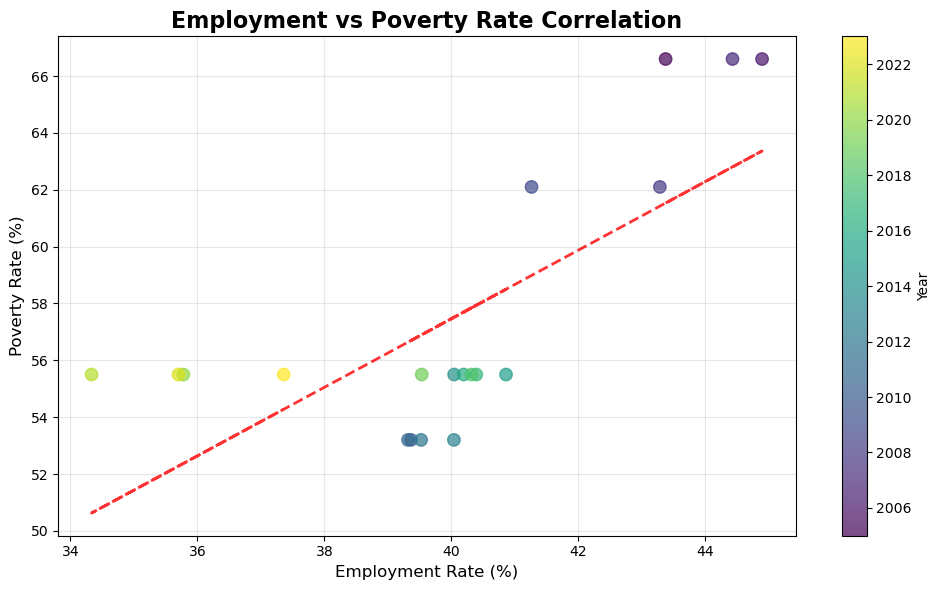

In [45]:
print("Generating correlation scatter plot...")
plt.figure(figsize=(10, 6))
if len(complete_data) > 0:
    scatter = plt.scatter(complete_data['employment_rate'], 
                          complete_data['poverty_rate'], 
                          alpha=0.7, s=80, c=complete_data['year'], cmap='viridis')
    plt.colorbar(scatter, label='Year')
    
    # Add trend line
    if len(complete_data) >= 2:
        z = np.polyfit(complete_data['employment_rate'], 
                       complete_data['poverty_rate'], 1)
        p = np.poly1d(z)
        plt.plot(complete_data['employment_rate'], 
                 p(complete_data['employment_rate']), 
                 "r--", alpha=0.8, linewidth=2)

plt.title('Employment vs Poverty Rate Correlation', fontsize=16, fontweight='bold')
plt.xlabel('Employment Rate (%)', fontsize=12)
plt.ylabel('Poverty Rate (%)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('correlation_scatter_plot.png')
plt.show()

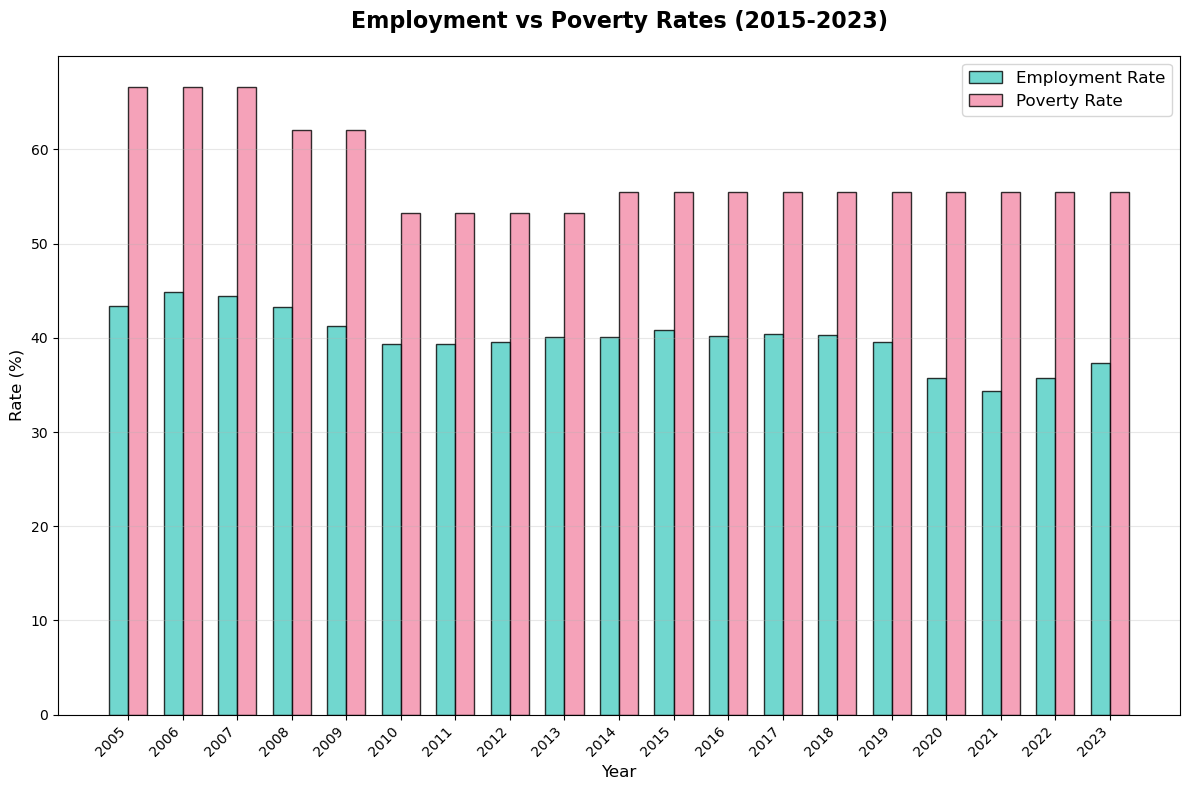

In [46]:
filtered_data = complete_data[(complete_data['year'] >= 2005) & (complete_data['year'] <= 2023)].copy()

years = filtered_data['year'].values
employment_rates = filtered_data['employment_rate'].values
poverty_rates = filtered_data['poverty_rate'].values

bar_width = 0.35
x_pos = np.arange(len(years))
    
plt.figure(figsize=(12, 8))
    
    
plt.bar(x_pos - bar_width/2, employment_rates, bar_width, label='Employment Rate', color='#4ECDC4', alpha=0.8, edgecolor='black', linewidth=1)
plt.bar(x_pos + bar_width/2, poverty_rates, bar_width, label='Poverty Rate', color='#F38BA8', alpha=0.8, edgecolor='black', linewidth=1)
    
    # Customize the chart
plt.title('Employment vs Poverty Rates (2015-2023)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Rate (%)', fontsize=12)
plt.xticks(x_pos, years, rotation=45, ha='right')
plt.legend(fontsize=12, loc='upper right')
plt.grid(True, alpha=0.3, axis='y')
    
plt.tight_layout()
plt.savefig('employment_poverty_sidebyside.png')
plt.show()

Generating employment rate histogram...


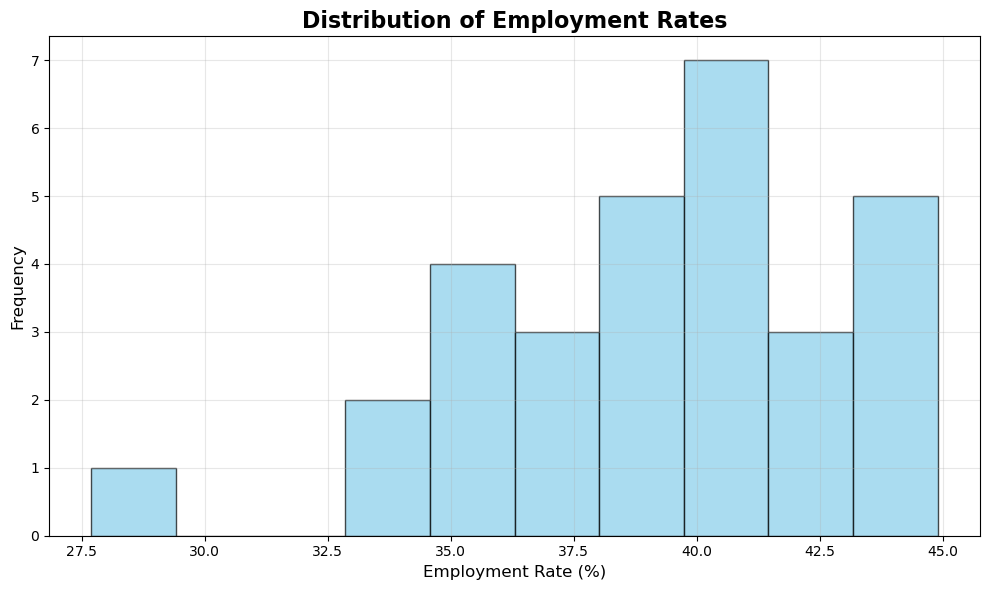

In [47]:
print("Generating employment rate histogram...")
plt.figure(figsize=(10, 6))
plt.hist(data['employment_rate'].dropna(), bins=10, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribution of Employment Rates', fontsize=16, fontweight='bold')
plt.xlabel('Employment Rate (%)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('employment_rate_histogram.png')
plt.show()

In [36]:
#connecting SQLite database
conn = sqlite3.connect('south_africa_data.db')  # creates a file south_africa_data.db
cursor = conn.cursor()

In [38]:
# Creating a new table
cursor.execute("""
CREATE TABLE IF NOT EXISTS sa_data (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    year INTEGER NOT NULL,
    country TEXT NOT NULL,
    employment_rate REAL,
    poverty_rate REAL
)
""")
conn.commit()

final_data.to_sql('sa_data', conn, if_exists='replace', index=False)

query = "SELECT * FROM sa_data"
df_from_db = pd.read_sql(query, conn)
print(df_from_db.head())

# Example: filter records for year >= 2015
query_2015 = "SELECT * FROM sa_data WHERE year >= 2015"
df_2015 = pd.read_sql(query_2015, conn)
print(df_2015.head())
print("Table created successfully!")

        country                         INDICATOR_LABEL_employment  year  \
0  South Africa  Employment to population ratio, 15+, total (%)...  1994   
1  South Africa  Employment to population ratio, 15+, total (%)...  1995   
2  South Africa  Employment to population ratio, 15+, total (%)...  1996   
3  South Africa  Employment to population ratio, 15+, total (%)...  1997   
4  South Africa  Employment to population ratio, 15+, total (%)...  1998   

   employment_rate  poverty_rate INDICATOR_LABEL_poverty  
0             38.2           NaN                    None  
1             37.8           NaN                    None  
2             34.8           NaN                    None  
3             27.7           NaN                    None  
4             34.0           NaN                    None  
        country                         INDICATOR_LABEL_employment  year  \
0  South Africa  Employment to population ratio, 15+, total (%)...  2015   
1  South Africa  Employment to popula

In [39]:
#Update Records Safely

cursor.execute("""
UPDATE sa_data
SET employment_rate = 62.5
WHERE year = 2020
""")
conn.commit()
print("Record updated successfully!")

Record updated successfully!


In [40]:
#Deleting records

cursor.execute("""
DELETE FROM sa_data
WHERE employment_rate IS NULL
""")
conn.commit()
print("Null records deleted successfully!")

Null records deleted successfully!


In [41]:
df_final = pd.read_sql("SELECT * FROM sa_data", conn)
print(df_final.head())

        country                         INDICATOR_LABEL_employment  year  \
0  South Africa  Employment to population ratio, 15+, total (%)...  1994   
1  South Africa  Employment to population ratio, 15+, total (%)...  1995   
2  South Africa  Employment to population ratio, 15+, total (%)...  1996   
3  South Africa  Employment to population ratio, 15+, total (%)...  1997   
4  South Africa  Employment to population ratio, 15+, total (%)...  1998   

   employment_rate  poverty_rate INDICATOR_LABEL_poverty  
0             38.2           NaN                    None  
1             37.8           NaN                    None  
2             34.8           NaN                    None  
3             27.7           NaN                    None  
4             34.0           NaN                    None  


FINDINGS

The analysis of South Africa’s employment and poverty data from 2005 to 2023 reveals several key trends. The employment rate shows a generally fluctuating but slightly upward trend, with peaks indicating periods of economic growth and troughs corresponding to economic slowdowns. Conversely, the poverty rate exhibits a gradual decline over time, although some years still have relatively high poverty levels, suggesting that increases in employment do not always immediately reduce poverty. The negative correlation between employment and poverty is evident, as higher employment years generally coincide with lower poverty rates, and lower employment years align with higher poverty levels. Conditional formatting highlights critical years, making it easy to identify periods of significant change, and overall, the data suggests that consistent employment programs and targeted social support are essential to sustain poverty reduction and economic improvement.